# Task 2 - Bootstrap and Jaccknife 

> Fitting our data

In [14]:
df<-read.csv("/kaggle/input/task2-df/Salary_Data.csv")

In [15]:
df

YearsExperience,Salary
<dbl>,<dbl>
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445


In [16]:
nrow(df)

[1] 30

> We have a total of 30 observation of salaries by years of experience by Engineers (USD)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  37731   56721   65237   76003  100545  122391 

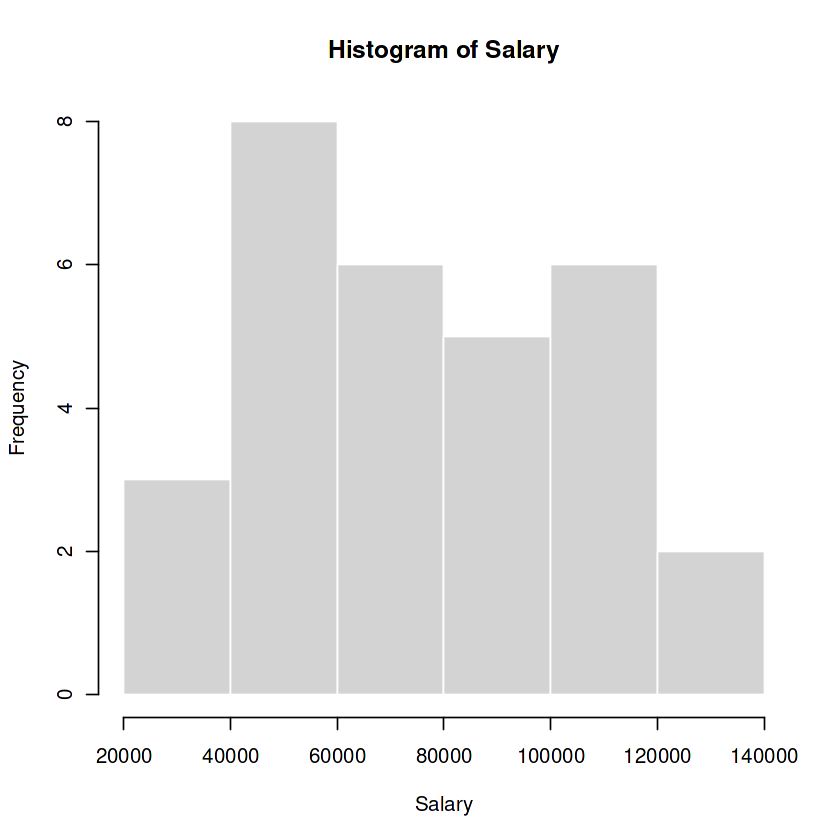

In [17]:
hist(df$Salary, main = "Histogram of Salary",
     xlab = "Salary", border = "white")

summary(df$Salary)

### We want to estimate the bias and variance of the mean salary of our data using Boostrap and Jackknife Method

In [18]:
cat("The mean salary of our data",mean(df$Salary))

The mean salary of our data 76003

> The original mean salary from our data was $76,003 . To estimate the uncertainty of this average, we applied and compare the bias and variance of resampling methods such as bootstrap, and jackknife.

### Boostrap Method

In [19]:
set.seed(123) 
sample.size <- nrow(df) # sample size
n.samples <-5000 #Number of Replicates

bootstrap.results <- c() #empty vector to hold the results

for (i in 1:n.samples)
{
    obs <- sample(1:sample.size, replace=TRUE)
    bootstrap.results[i] <- mean(df$Salary[obs]) # Mean of the bootstrap sample
}

In [20]:
# Calculate 95% Confidence Interval using the percentile met

bootstrap_ci_lower <- quantile(bootstrap.results, 0.025)
bootstrap_ci_upper <- quantile(bootstrap.results, 0.975)

cat("95% Bootstrap Confidence Interval for Mean Salary:\n")
cat("Lower Bound:", round(bootstrap_ci_lower, 2), "\n")
cat("Upper Bound:", round(bootstrap_ci_upper, 2))

95% Bootstrap Confidence Interval for Mean Salary:
Lower Bound: 66288.51 
Upper Bound: 85667.32

> There is a 95% chance that the true population mean salary lies between 66,288.51 USD and 85,667.32 USD , based on the resampled distributions of the sample mean.

In [21]:
# Variance (Bootstrap)
bootstrap_variance <- var(bootstrap.results)
cat("Bootstrap estimate of variance of mean salary:", bootstrap_variance)   

Bootstrap estimate of variance of mean salary: 24697142

> The variance determine how far each observation is from the mean and from every other number in the set.

In [23]:
# Bias (Bootstrap
x<-df$Salary
theta_hat <- mean(x) #original mean
boostrap_mean <- mean(bootstrap.results) # mean of resampled

bootstrap_bias <- boostrap_mean - theta_hat #formula for bias

cat("θ̂ (original estimate):", theta_hat, "\n")
cat("θ̂* (mean of bootstrap estimates):", boostrap_mean, "\n")
cat("Bootstrap Bias (θ̂* - θ̂):", bootstrap_bias, "\n")

θ̂ (original estimate): 76003 
θ̂* (mean of bootstrap estimates): 75935.05 
Bootstrap Bias (θ̂* - θ̂): -67.95098 


> On average, the bootstrap samples gave a mean salary $ 67.95 less than the original sample mean. Which is not too far from our original mean

In [26]:
#standard error of Bootstrap Estimates

bootstrap_se<-sd(bootstrap.results)
cat("Bootstrap Standard Error:", bootstrap_se)      

Bootstrap Standard Error: 4969.622

It essentially quantifies how much the sample mean is likely to vary if we are to repeat the sampling process multiple times from the same population: 76067.85 ± about 4969.622 in USD.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  58143   72541   75933   75935   79253   94718 

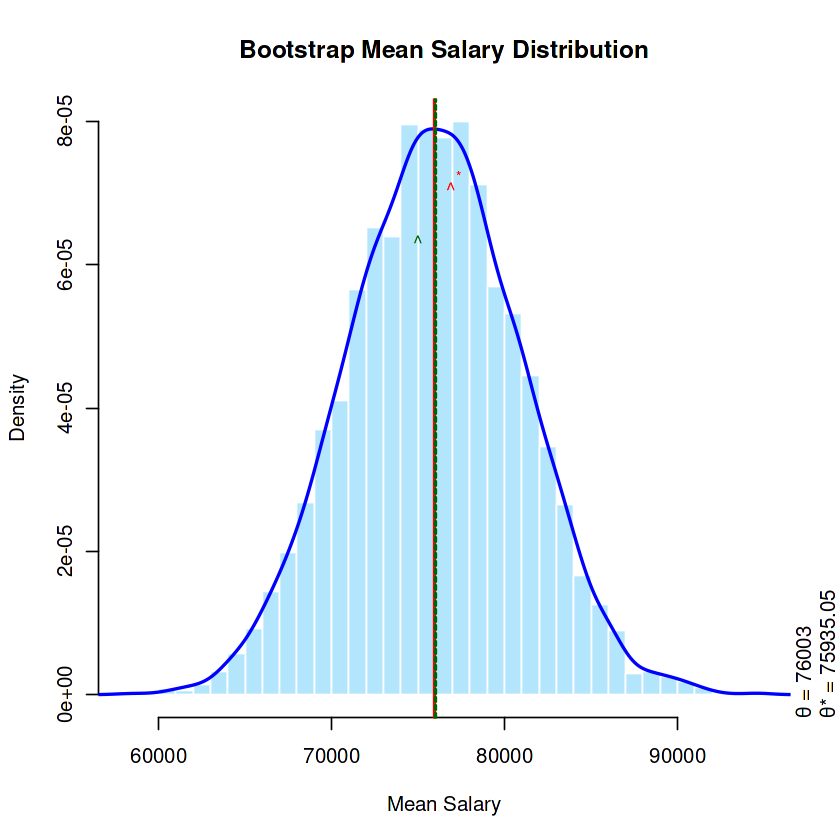

In [34]:
# Visualize the  Distirbution of Resampled Mean Salary

hist(bootstrap.results,
     breaks = 30,
     col = "#B3E5FC",
     border = "white",
     freq = FALSE,
     main = "Bootstrap Mean Salary Distribution",
     xlab = "Mean Salary")


lines(density(bootstrap.results), col = "blue", lwd = 2)
abline(v = boostrap_mean, col = "red", lwd = 2)
abline(v = theta_hat, col = "darkgreen", lwd = 2, lty = 2)

text(x = boostrap_mean,
     y = max(density(bootstrap.results)$y) * 0.9,
     labels = expression(hat(theta)^"*"),
     col = "red", pos = 4)

text(x = theta_hat,
     y = max(density(bootstrap.results)$y) * 0.8,
     labels = expression(hat(theta)),
     col = "darkgreen", pos = 2)


bias_text <- paste0("θ̂ = ", round(theta_hat, 2), "\n",
                    "θ̂* = ", round(boostrap_mean, 2), "\n",
                    "Bias = ", round(bootstrap_bias, 2))

mtext(bias_text, side = 4, line = 2, col = "black", adj = 0)

summary(bootstrap.results)
     

### Jackknife

In [45]:
sample.size <- nrow(df) #sample size
x<-df$Salary # data
theta.hat<-mean(x) #mean of x

theta.jack <- numeric(sample.size) #storage

for (i in 1:sample.size){
theta.jack[i]<-mean(x[-i])
}

In [37]:
# Calculate 95% Confidence Interval using the percentile method

jackknife_ci_lower <- quantile(theta.jack, 0.025)
jackknife_ci_upper <- quantile(theta.jack, 0.975)

cat("95% Jackkknife Confidence Interval for Mean Salary:\n")
cat("Lower Bound:", round(jackknife_ci_lower, 2), "\n")
cat("Upper Bound:", round(jackknife_ci_upper, 2))

95% Jackkknife Confidence Interval for Mean Salary:
Lower Bound: 74416.39 
Upper Bound: 77282.42

> There is a 95% chance that the true population mean salary lies between 74,416.39 USD and 77,282.42 USD , based on the resampled distributions of the sample mean.

In [40]:
#Jackknife Mean variance
jackknife_var <- (sample.size - 1) / sample.size * sum((theta.jack - mean(theta.jack))^2)
cat("Jackknife variance estimate for mean salary:", jackknife_var)

Jackknife variance estimate for mean salary: 25051699

> The variance determine how far each observation is from the mean and from every other number in the set.

In [42]:
#Jackknife Bias
mean_jackknife<-mean(theta.jack)
cat("θ̂ (original estimate):", theta_hat, "\n")
cat("θ̂ (Jackknife estimate):",mean_jackknife , "\n")
jackknife_bias<-(sample.size-1)*(mean(theta.jack)-theta.hat)
cat("Jackknife Bias estimate for mean salary:", jackknife_bias)

θ̂ (original estimate): 76003 
θ̂ (Jackknife estimate): 76003 
Jackknife Bias estimate for mean salary: 0

> The sample mean is stable not affected by individual data points as Bias = 0. This is expected as the purpose of the jackknife technique is to reduce the bias of a statistic in its estimation

In [43]:
# Jackknfife Standard Error

jackknife_se<-sqrt((sample.size-1)*mean((theta.jack - mean(theta.jack))^2))
cat("Jackknife Standard Error :", jackknife_se)

Jackknife Standard Error : 5005.167

It essentially quantifies how much the sample mean is likely to vary if we are to repeat the sampling process multiple times from the same population: 76003 ± about 5,005.167 in USD.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  74403   75157   76374   76003   76668   77323 

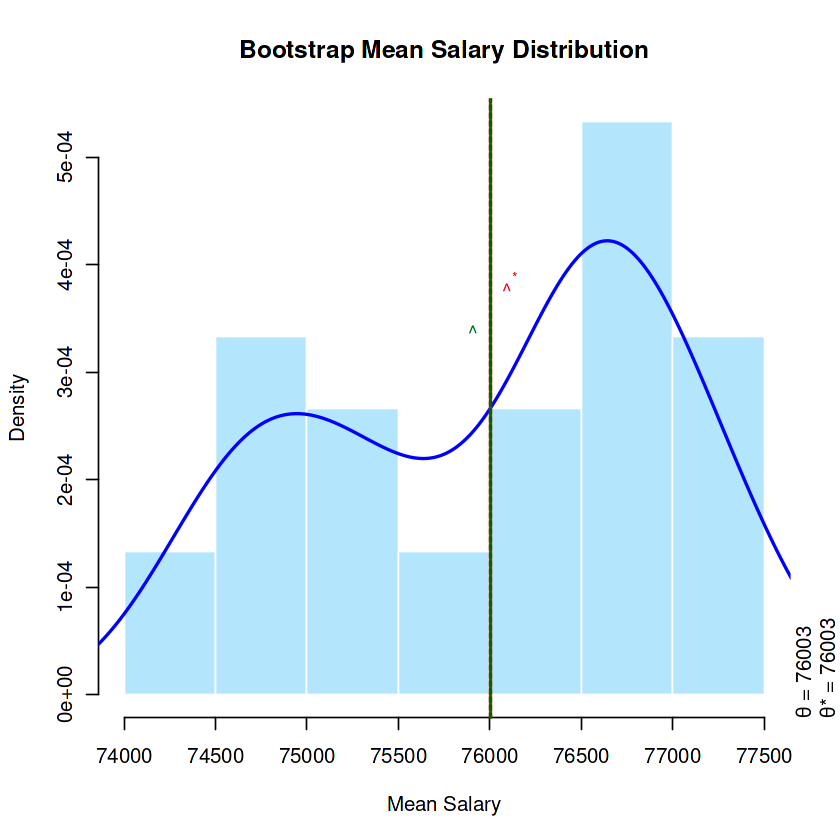

In [49]:
# Visualize the Resampling Results

hist(theta.jack,
     col = "#B3E5FC",
     border = "white",
     freq = FALSE,
     main = "Bootstrap Mean Salary Distribution",
     xlab = "Mean Salary")


lines(density(theta.jack), col = "blue", lwd = 2)
abline(v = mean(theta.jack), col = "red", lwd = 2)
abline(v = theta_hat, col = "darkgreen", lwd = 2, lty = 2)


text(x = mean_jackknife,
     y = max(density(theta.jack)$y) * 0.9,
     labels = expression(hat(theta)^"*"),
     col = "red", pos = 4)

text(x = theta_hat,
     y = max(density(theta.jack)$y) * 0.8,
     labels = expression(hat(theta)),
     col = "darkgreen", pos = 2)


bias_text <- paste0("θ̂ = ", round(theta_hat, 2), "\n",
                    "θ̂* = ", round(mean_jackknife, 2), "\n",
                    "Bias = ", round(jackknife_bias, 2))

mtext(bias_text, side = 4, line = 2, col = "black", adj = 0)
summary(theta.jack)

# Theoretical vs Estimate Results Comparison

In [50]:
n <- nrow(df)
x <- df$Salary

#Theoretical Values

theoretical_variance<-var(x)/n #variance of mean
theoretical_mean<-mean(x) #original mean
theoretical_se<-sd(x)/sqrt(n) #standard error
theoretical_ci_lower <- quantile(x, 0.025)  #lower quantile
theoretical_ci_upper <- quantile(x, 0.975) #upper quantile 

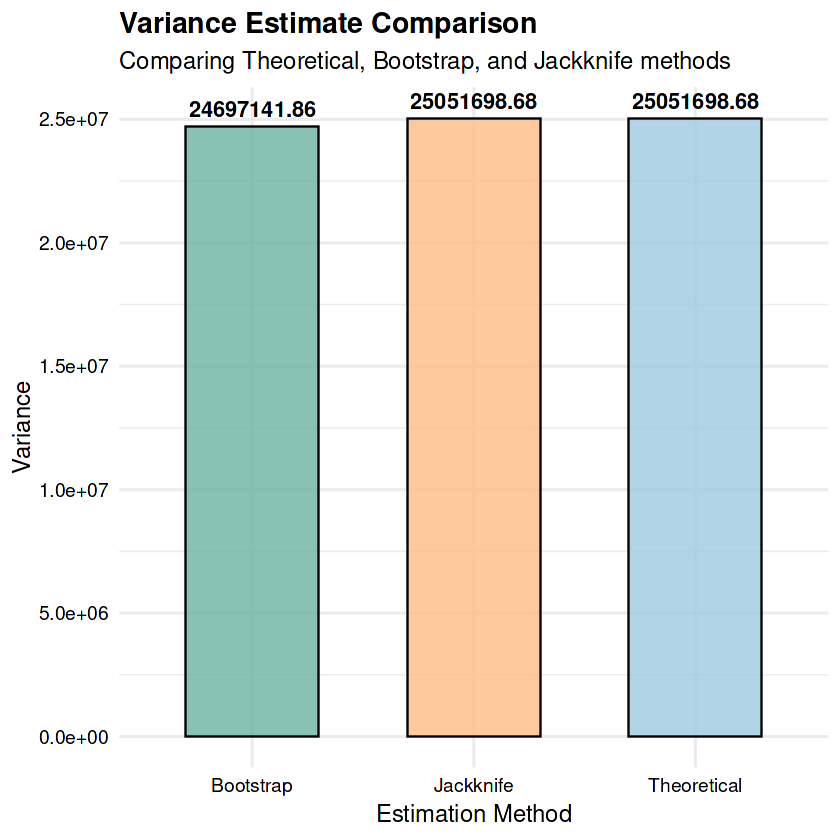

In [51]:
library(ggplot2)

variance_df <- data.frame(
  Method = c("Theoretical", "Bootstrap", "Jackknife"),
  Variance = c(theoretical_variance, bootstrap_variance, jackknife_var)
)

ggplot(variance_df, aes(x = Method, y = Variance, fill = Method)) +
  geom_col(width = 0.6, color = "black", alpha = 0.8, show.legend = FALSE) +
  geom_text(aes(label = round(Variance, 2)), 
            vjust = -0.6, size = 4.5, fontface = "bold") +
  scale_fill_manual(values = c("#69b3a2", "#fdbb84", "#9ecae1")) +
  labs(
    title = "Variance Estimate Comparison",
    subtitle = "Comparing Theoretical, Bootstrap, and Jackknife methods",
    x = "Estimation Method",
    y = "Variance"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold"),
    axis.text = element_text(color = "black")
  )

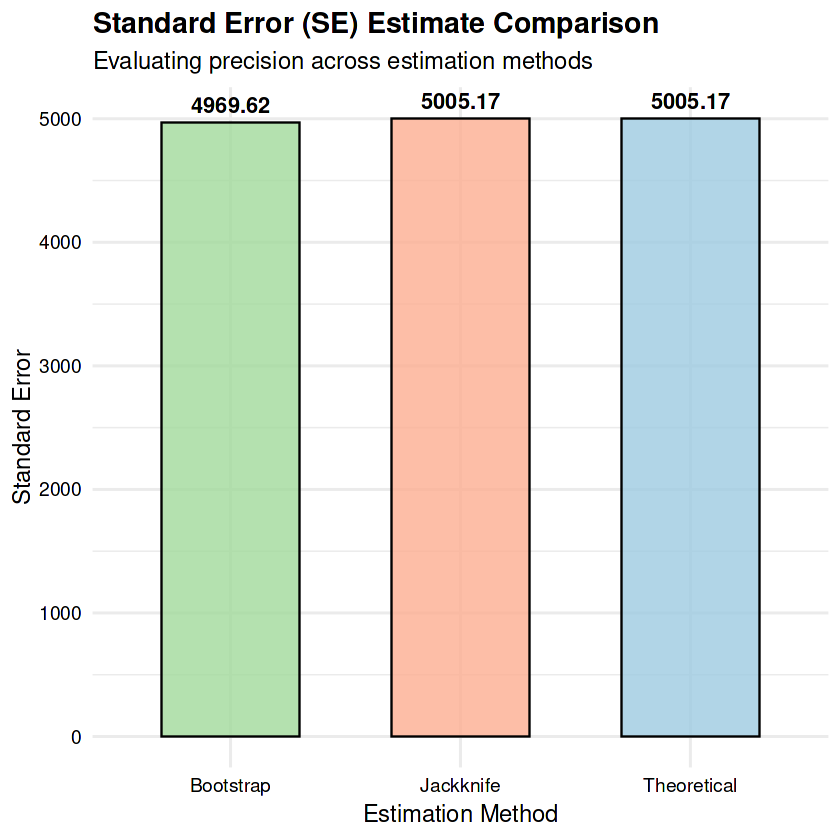

In [52]:
se_df <- data.frame(
  Method = c("Theoretical", "Bootstrap", "Jackknife"),
  SE = c(theoretical_se, bootstrap_se, jackknife_se)
)

ggplot(se_df, aes(x = Method, y = SE, fill = Method)) +
  geom_col(width = 0.6, color = "black", alpha = 0.8, show.legend = FALSE) +
  geom_text(aes(label = round(SE, 2)), 
            vjust = -0.6, size = 4.5, fontface = "bold") +
  scale_fill_manual(values = c("#a1d99b", "#fcae91", "#9ecae1")) +
  labs(
    title = "Standard Error (SE) Estimate Comparison",
    subtitle = "Evaluating precision across estimation methods",
    x = "Estimation Method",
    y = "Standard Error"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold"),
    axis.text = element_text(color = "black")
  )


# Summary

In [54]:
methods <- c("Theoretical", "Bootstrap", "Jackknife")

ci_lower <- c(theoretical_ci_lower, bootstrap_ci_lower, jackknife_ci_lower)
ci_upper <- c(theoretical_ci_upper, bootstrap_ci_upper, jackknife_ci_upper)
variance <- c(theoretical_variance, bootstrap_variance, jackknife_var)
se <- c(theoretical_se, bootstrap_se, jackknife_se)

ci_summary <- data.frame(
  Method = methods,
  CI_Lower = round(ci_lower, 2),
  CI_Upper = round(ci_upper, 2),
  Variance = round(variance, 2),
  Standard_Error = round(se, 2)
)

cat("Original Mean: ", "$",mean(x), "\n")
cat("Bootstrap Resampled Mean estimate):","$",boostrap_mean, "\n")
cat("Jackknife Resampled Mean:","$",mean_jackknife, "\n")


knitr::kable(ci_summary, caption = "Summary of 95% Confidence Intervals, Variance, and SEs")


Original Mean:  $ 76003 
Bootstrap Resampled Mean estimate): $ 75935.05 
Jackknife Resampled Mean: $ 76003 




Table: Summary of 95% Confidence Intervals, Variance, and SEs

|Method      | CI_Lower|  CI_Upper| Variance| Standard_Error|
|:-----------|--------:|---------:|--------:|--------------:|
|Theoretical | 38899.70| 122014.73| 25051699|        5005.17|
|Bootstrap   | 66288.51|  85667.32| 24697142|        4969.62|
|Jackknife   | 74416.39|  77282.42| 25051699|        5005.17|

> **Takeaways**

Both the theoretical and jackknife variance estimates were the same. The bootstrap method gave a slightly lower variance  and standard error, shows that bootstrap method is much effective on capturing uncertainty in our data

This result can be due to jackknife resampled data is very similar to the original data (only one value removed per iteration). As a result, the confidence interval is narrow, and it may underestimate the true uncertainty. While, the Boostrap Method resamples with replacement from the data to create many resampled datasets. This allows it to explore a wider range of possible outcomes, including more variability in the estimate

All three methods agree closely, showing that the  original mean salary is a stable and reliable estimate. However, the bootstrap method provides the best balance of accuracy and realism  to estimate uncertainty.